# <center><u>Insurance Claim Prediction</u></center>
### <center>Training Models on Imbalanced Data: Case Study</center>

In the insurance industry, predicting the likelihood of claims is critical for risk assessment and policy pricing. However, insurance claims datasets often exhibit class imbalance, with non-claims outnumbering actual claims. This imbalance can lead to predictive models that are biased towards the majority class, resulting in poor predictive performance for the minority class, which is often of greater interest.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('datasets/Insurance claims data.csv')

In [3]:
data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [7]:
data.shape

(58592, 41)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [6]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

The dataset contains 58,592 entries and 41 columns, including the target variable claim_status. It is based on the problem of insurance claim frequency prediction. Here’s a brief overview of some of the features:

- policy_id: Unique identifier for the insurance policy
- subscription_length, vehicle_age, customer_age: Numeric attributes related to the policy, vehicle, and customer
- region_code, segment, model, fuel_type: Categorical attributes representing the region, vehicle segment, model, and fuel type
- max_torque, max_power, engine_type: Specifications of the vehicle’s engine
- airbags, is_esc, is_adjustable_steering: Features related to the vehicle’s safety and convenience
- claim_status: Target variable indicating whether a claim was made (1) or not (0)

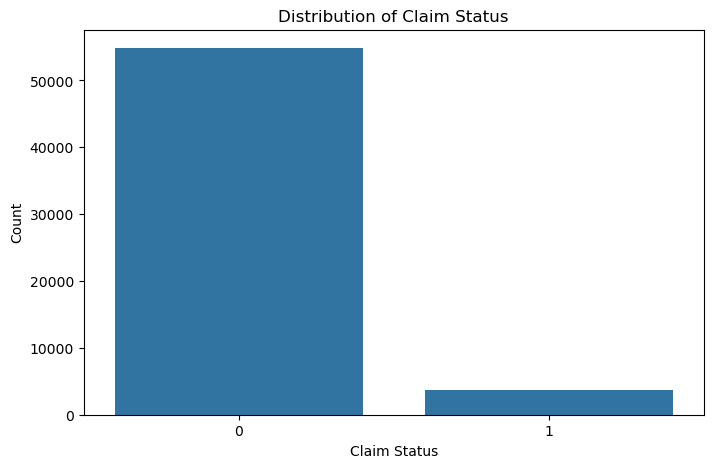

In [14]:
# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0). This imbalance will be a challenge to address during the model training phase to ensure our model does not become biased toward predicting the majority class.

- Analysis of both numerical and categorical features to understand their distributions and relationships with the claim_status

In [15]:
num_cols = ['subscription_length', 'vehicle_age', 'customer_age']
cat_cols = ['region_code', 'segment', 'fuel_type']

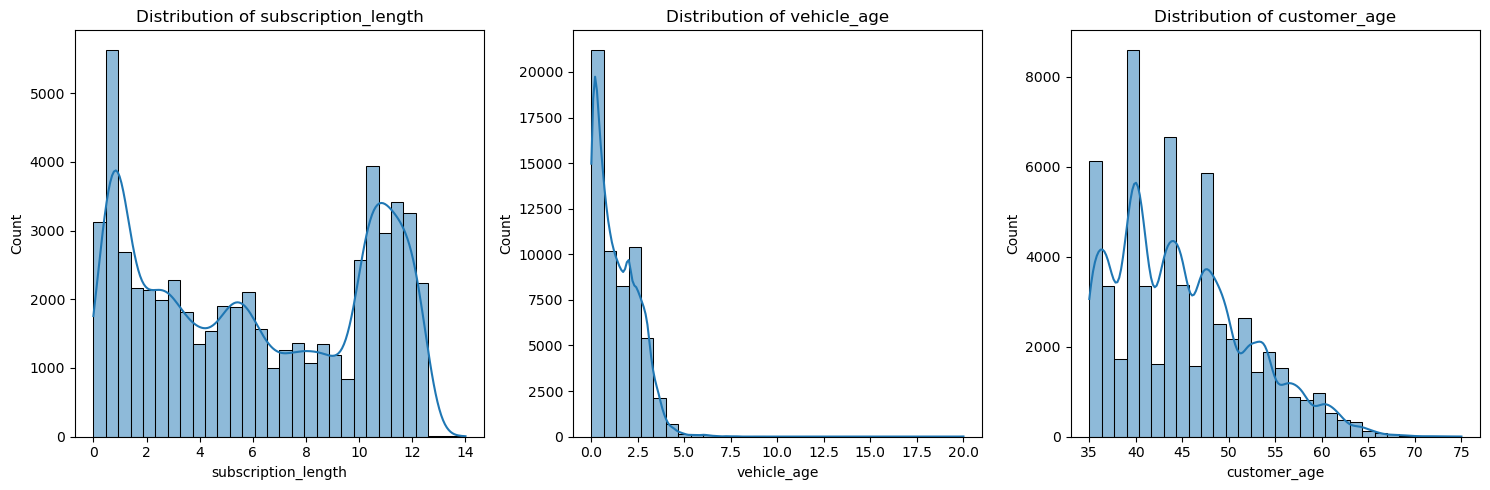

In [84]:
# Numerical Feature distribution by claim_status
plt.figure(figsize=(15, 5))
for i, column in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

- subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.- 
vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset
- 
customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

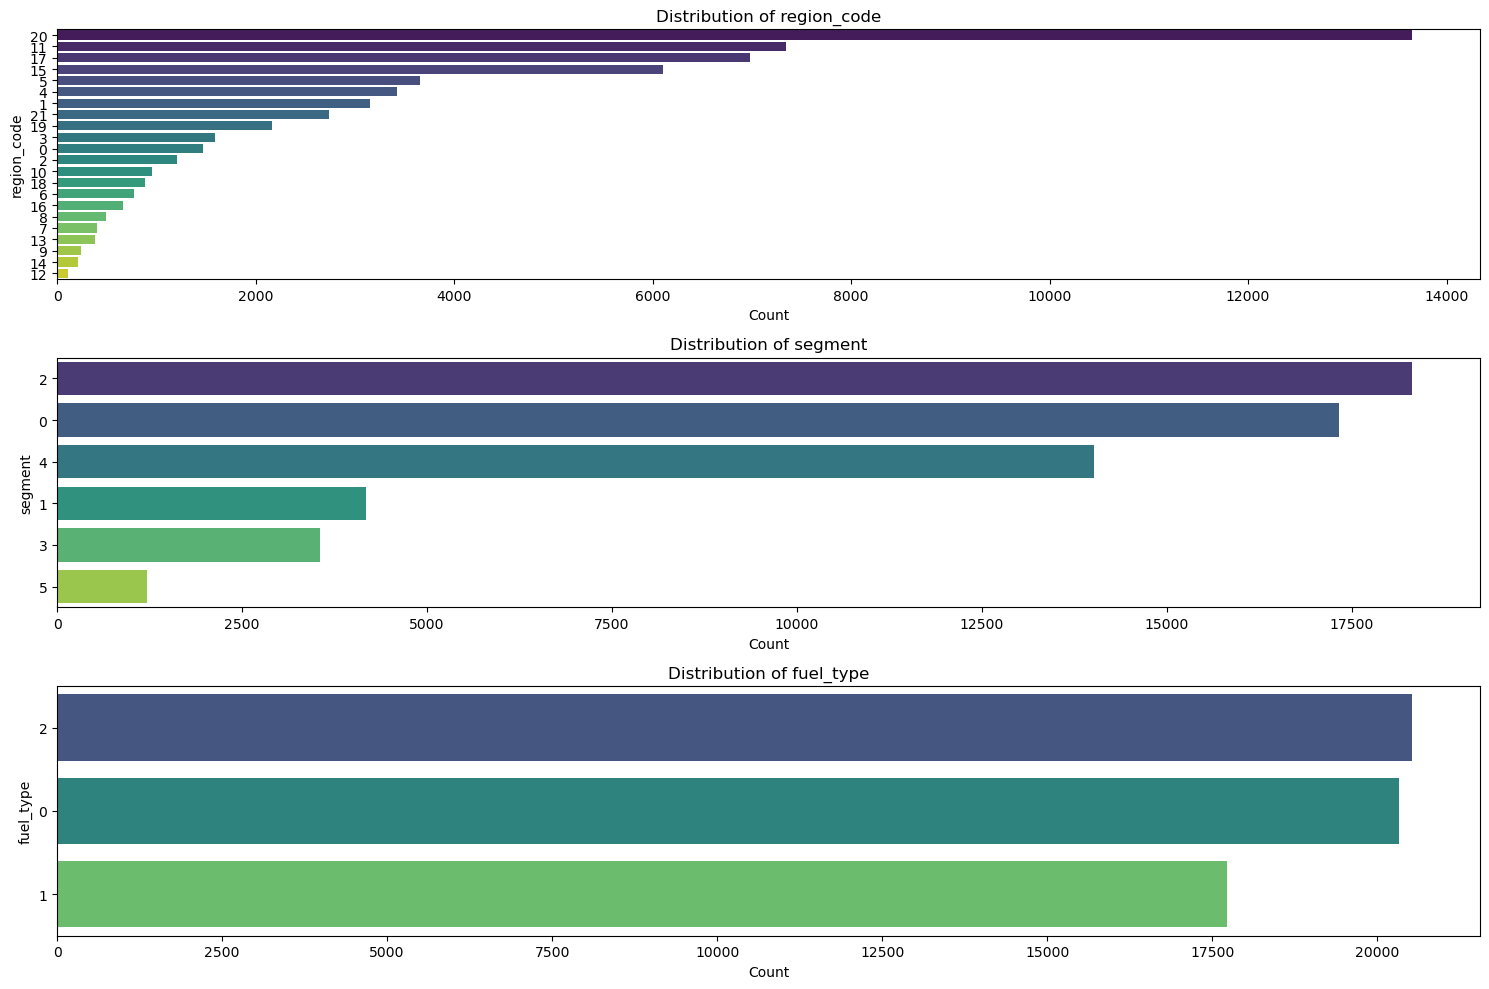

In [99]:
# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index,palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

For ‘region_code,’ there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. In the ‘segment’ distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common. Lastly, ‘fuel_type’ shows three categories: ‘Petrol’ has the highest count than CNG and Diesel.

## Feature Selection


Feature selection is a crucial step in machine learning to improve model performance, reduce overfitting, and enhance interpretability. Python offers several libraries and techniques for feature selection
- identify the most important variables for predicting insurance frequency claims. It involves analyzing both categorical and numerical features to determine their impact on the target variable.

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [37]:
# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

In [38]:
# separate features and target variable
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

In [39]:
# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

- Random Forest and Gradient Boosting Machines provide feature importance scores that can be used for feature selection.

In [40]:
# get feature importance
feature_importance = rf_model.feature_importances_

In [41]:
# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

In [42]:
print(features_df.head(10))

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


The top 10 most important variables for predicting insurance frequency claims, according to the Random Forest model, are:

- policy_id: Unique identifier for the insurance policy
- subscription_length: Length of the insurance subscription
- customer_age: Age of the customer
- vehicle_age: Age of the vehicle
- region_density: Population density of the region
- region_code: Code representing the region
- model: Model of the vehicle
- engine_type: Type of engine in the vehicle
- gross_weight: Gross weight of the vehicle
- length: Length of the vehicle

These variables appear to have the most influence on the likelihood of an insurance claim being made. However, it’s notable that policy_id has a very high importance, which might not be intuitively relevant for prediction. So, we need to make sure to drop the policy_id column while model training.

## Handling Imbalanced Data

In [21]:
from sklearn.utils import resample

In [22]:
# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

In [24]:
# oversample the minority class
min_oversampled=resample(minority,replace=True,n_samples=len(majority),random_state=49)

In [26]:
# Combine majority and the min_oversampled
dist=pd.concat([majority,min_oversampled])

In [27]:
dist.claim_status.value_counts()

0    54844
1    54844
Name: claim_status, dtype: int64

- oversampling on the minority class, both classes are balanced with 54,844 entries each.

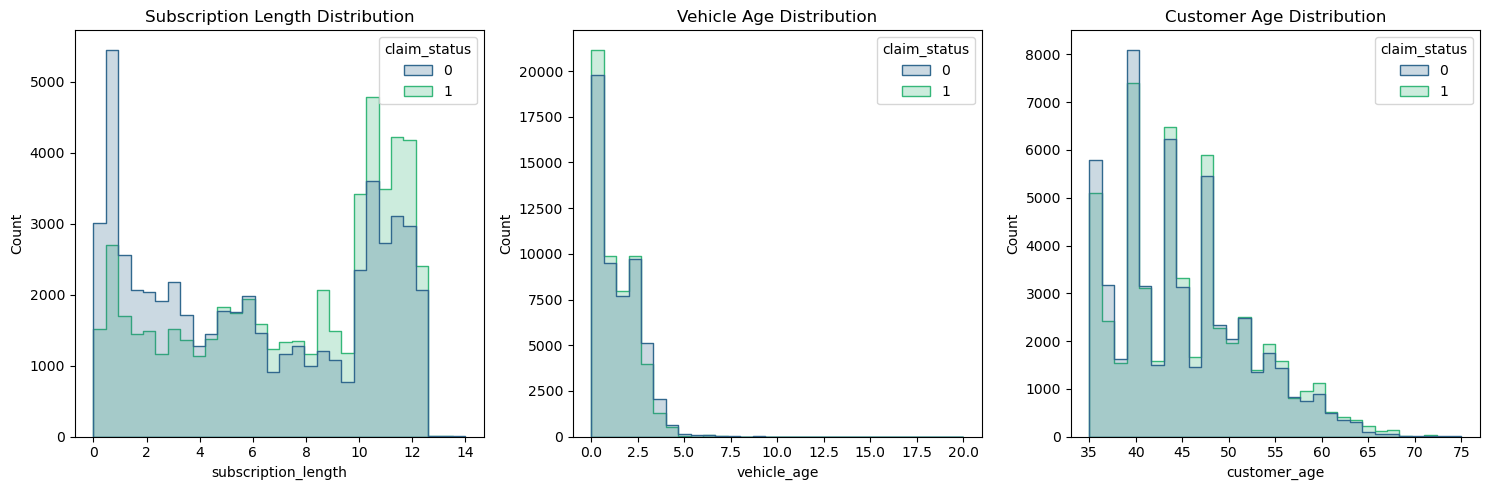

In [98]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=dist, x='customer_age', hue='claim_status', element='step', bins=30,palette='viridis')
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=dist, x='vehicle_age', hue='claim_status', element='step', bins=30,palette='viridis')
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=dist, x='subscription_length', hue='claim_status', element='step', bins=30,palette='viridis')
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

- The oversampled data does look like the original data

## Model Training

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [44]:
# drop 'Policy_id' column from the data
dist = dist.drop('policy_id', axis=1)

In [45]:
# prepare the oversampled data
X_dist = dist.drop('claim_status', axis=1)
y_dist = dist['claim_status']

In [46]:
# encoding categorical columns
X_dist_encoded = X_dist.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

In [47]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_dist_encoded, y_dist, test_size=0.3, random_state=49)

In [52]:
# create and train the Random Forest model
rfm = RandomForestClassifier(random_state=49)
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=49)

In [54]:
# predictions
y_pred = rfm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16377
           1       0.96      1.00      0.98     16530

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



- The classification report above provides various metrics to evaluate the performance of the predictive model on the test data

1. For class 0 (no claim), precision is 1.00, meaning that when the model predicts no claim, it is correct 100% of the time. For class 1 (claim), precision is 0.98, indicating that when the model predicts a claim, it is correct 98% of the time.
2. For class 0, recall is 0.98, signifying that the model correctly identifies 98% of all actual no-claim instances. For class 1, recall is 1.00, showing that the model correctly identifies 100% of all actual claim instances.
3. The F1-score for both classes is 0.99, indicating a high balance between precision and recall. It means the model is both accurate and reliable in its predictions across both classes.
4. The overall accuracy of the model is 99%, which means that it correctly predicts the claim status for 99% of the cases in the test dataset.
5. The macro average for precision, recall and F1-score is 0.99, reflecting the average performance of the model across both classes without considering the imbalance in class distribution. This high value suggests that the model performs well across both classes. The weighted average for precision, recall, and F1-score is also 0.99, taking into account the imbalance in class distribution. It indicates that, on average, the model performs consistently well across the different classes when considering their distribution in the dataset.

- These results indicate a highly effective model for predicting insurance claims, with strong performance metrics across both classes of outcomes. The high recall for claims (class 1) is particularly notable as it implies that the model is very effective at identifying the instances where claims occur, which is often the primary concern in imbalanced datasets.

### Labelling the original imbalanced data using our model

In [58]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_dist[col]) for col in X_dist.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rfm.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


### visualizing the percentage of correctly classified and misclassified samples

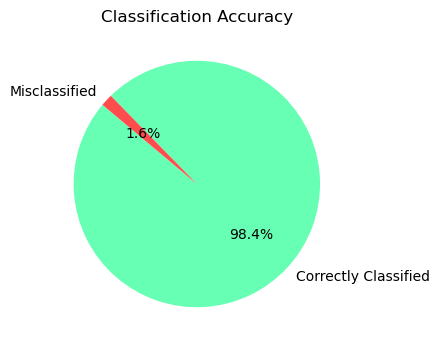

In [119]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(4,4))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140,colors=['#66ffb3','#ff4d4d'])
plt.title('Classification Accuracy')
plt.show()

## Conclusion

Addressing class imbalance in classification tasks is crucial due to the disparity in class distribution, where one class vastly outnumbers the other, leading to biased models favoring the majority class and poor performance on the minority class. Techniques such as resampling (oversampling or undersampling), algorithmic adjustments, and ensemble methods (boosting, bagging) can mitigate this issue by either rebalancing the dataset or adjusting algorithms to give equal consideration to all classes. Implementing these strategies enhances the predictive performance of models on imbalanced data, ensuring fair treatment of all classes and improving overall classification accuracy and reliability.